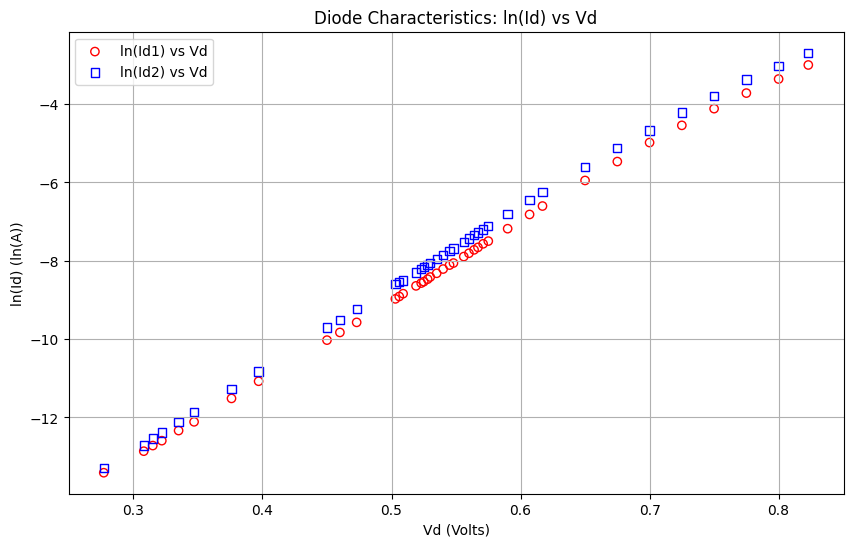

Characteristics for Diode D1:
Ideality factor (n): 1.880
Saturation current (Is): 4.097e-09 A


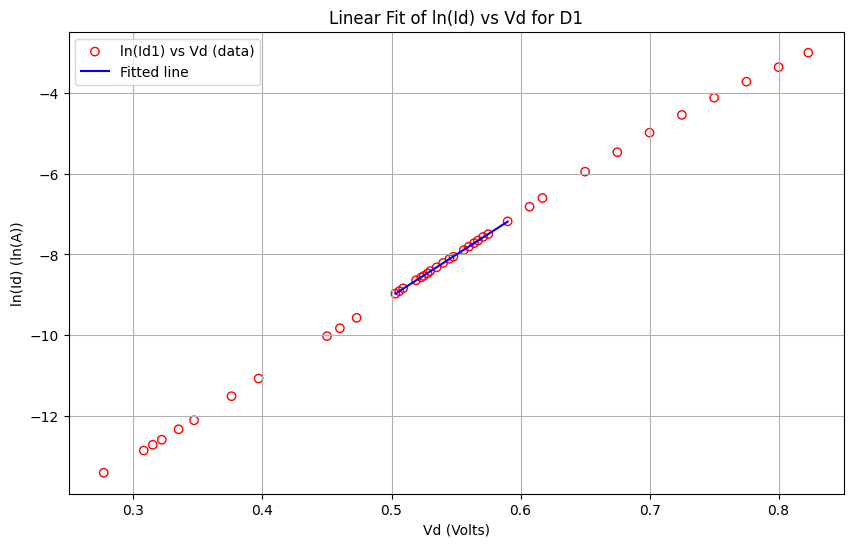

Characteristics for Diode D2:
Ideality factor (n): 1.852
Saturation current (Is): 4.994e-09 A


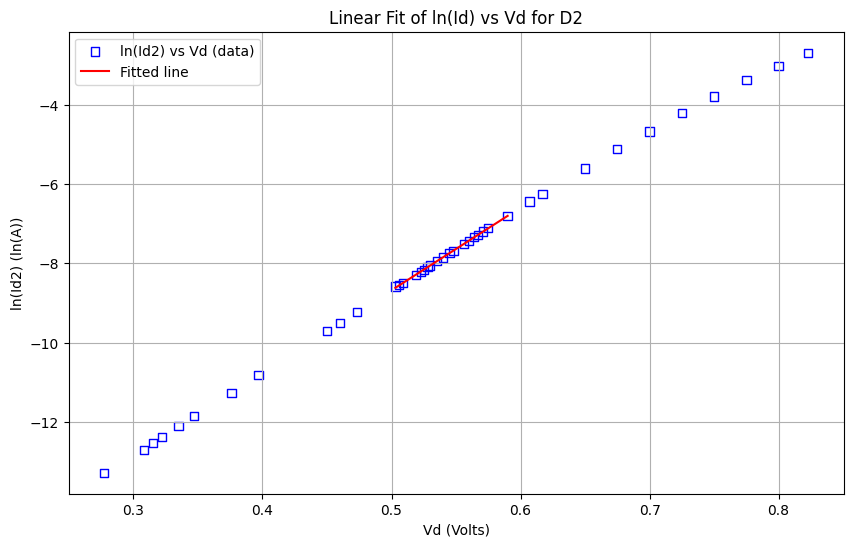

For D1 :
For Vd = 0.500 V, Id = 1.192e-04 A
For Vd = 0.600 V, Id = 9.315e-04 A
Slope (1/n1*Vt) = 20.557097337855893
a1 (n1*Vt) = 0.048645
a2 (n1*Vt*ln(Is*R)) = -0.35625967791100094
Vb1 (a2/2) = -0.17812983895550047
 
For D2 :
For Vd = 0.500 V, Id= 1.698e-04 A
For Vd = 0.600 V, Id= 1.368e-03 A
Slope (1/n2*Vt) = 20.867895785728443
 
730.9106143277752


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Load data from the file
data = np.loadtxt("Diode Characteristics.txt", skiprows=1)  # Skip header row
Vd = data[:, 0]  # Diode voltage (V)
Id1 = data[:, 1]  # Diode current (I_D1)
Id2 = data[:, 2]  # Diode current (I_D2)

# Compute ln(Id) for both diodes
ln_Id1 = np.log(Id1)
ln_Id2 = np.log(Id2)

# Plot ln(Id) vs Vd
plt.figure(figsize=(10, 6))
plt.scatter(Vd, ln_Id1, label="ln(Id1) vs Vd", marker="o", facecolors='none', edgecolors='r')
plt.scatter(Vd, ln_Id2, label="ln(Id2) vs Vd", marker="s", facecolors='none', edgecolors='b')
plt.xlabel("Vd (Volts)")
plt.ylabel("ln(Id) (ln(A))")
plt.title("Diode Characteristics: ln(Id) vs Vd")
plt.legend()
plt.grid(True)
plt.show()

# Manually select the linear region for fitting
# Adjust the indices below to match the linear region in the plot
linear_region_indices = (Vd > 0.5) & (Vd < 0.6)  # Example range; adjust as needed
Vd_linear = Vd[linear_region_indices]
ln_Id1_linear = ln_Id1[linear_region_indices]
ln_Id2_linear = ln_Id2[linear_region_indices]

# Fit a straight line to the linear region
slope, intercept, r_value, p_value, std_err = linregress(Vd_linear, ln_Id1_linear)

# Extract parameters
k = 1.38e-23  # Boltzmann constant (J/K)
q = 1.6e-19  # Electron charge (C)
T = 300  # Temperature in Kelvin (approx. room temp)
Vt = k * T / q  # Thermal voltage

n = 1 / (slope * Vt)  # Ideality factor
Is = np.exp(intercept)  # Saturation current

# Print the extracted parameters
print(f"Characteristics for Diode D1:")
print(f"Ideality factor (n): {n:.3f}")
print(f"Saturation current (Is): {Is:.3e} A")

# Plot the fitted line on the original data
plt.figure(figsize=(10, 6))
plt.scatter(Vd, ln_Id1, label="ln(Id1) vs Vd (data)", marker="o", facecolors='none', edgecolors='r')
plt.plot(Vd_linear, slope * Vd_linear + intercept, label="Fitted line", color="blue")
plt.xlabel("Vd (Volts)")
plt.ylabel("ln(Id) (ln(A))")
plt.title("Linear Fit of ln(Id) vs Vd for D1")
plt.legend()
plt.grid(True)
plt.show()


# Foe 2nd Diode
slope, intercept, r_value, p_value, std_err = linregress(Vd_linear, ln_Id2_linear)

Vt = k * T / q  # Thermal voltage

n = 1 / (slope * Vt)  # Ideality factor
Is = np.exp(intercept)  # Saturation current

# Print the extracted parameters
print(f"Characteristics for Diode D2:")
print(f"Ideality factor (n): {n:.3f}")
print(f"Saturation current (Is): {Is:.3e} A")


# Plot the fitted line on the original data
plt.figure(figsize=(10, 6))
plt.scatter(Vd, ln_Id2, label="ln(Id2) vs Vd (data)", marker="s", facecolors='none', edgecolors='b')
plt.plot(Vd_linear, slope * Vd_linear + intercept, label="Fitted line", color="red")
plt.xlabel("Vd (Volts)")
plt.ylabel("ln(Id2) (ln(A))")
plt.title("Linear Fit of ln(Id) vs Vd for D2")
plt.legend()
plt.grid(True)
plt.show()


# Function to calculate Is using the fitted regression line
def calculate_Is(Vd_input, slope, intercept):
    """
    Calculate Is for a given Vd using the fitted linear regression parameters.
    
    Parameters:
        Vd_input (float or np.array): Input diode voltage(s) Vd
        slope (float): Slope of the linear regression line
        intercept (float): Intercept of the linear regression line
        
    Returns:
        Is (float or np.array): Calculated saturation current(s) Is
    """
    ln_Is = slope * Vd_input + intercept
    Is = np.exp(ln_Is)  # Convert ln(Is) to Is
    return Is


n1 = 1.880
n2 = 1.852
Is1 = 4.097e-09
Is2 = 4.994e-09
inter1 = np.log(Is1)
inter2 = np.log(Is2)
sl1 = 1/(n1*Vt)
sl2 = 1/(n2*Vt)


# Example: Calculate Is for a range of Vd
Vd_input = np.array([0.5, 0.6])  # Input Vd values (adjust as needed)
Is_values1 = calculate_Is(Vd_input, sl1, inter1)
Is_values2 = calculate_Is(Vd_input, sl2, inter2)

# Display the results
print(f"For D1 :")
for vd, is_val in zip(Vd_input, Is_values1):
    print(f"For Vd = {vd:.3f} V, Id = {is_val:.3e} A")
print(f"Slope (1/n1*Vt) = {sl1}")
print(f"a1 (n1*Vt) = {1/sl1}")
R = 16.103e+04
a2 = (1/sl1)*np.log(Is1*R)
print(f"a2 (n1*Vt*ln(Is*R)) = {a2}" )
print(f"Vb1 (a2/2) = {a2/2}")

print(" ")
print(f"For D2 :")
for vd, is_val in zip(Vd_input, Is_values2):
    print(f"For Vd = {vd:.3f} V, Id= {is_val:.3e} A")
print(f"Slope (1/n2*Vt) = {sl2}")
# print(f"a1 (n1*Vt) = {1/sl1}")

Vb2 = 0.6
power = Vb2*sl2
expo = np.exp(power)
coeff = Is2*expo 
R3 = 1/coeff
print(" ")
print(R3)